# Sampling

We discuss an observation strategy for obtain a movie of M87*.

Scientifically, we are interested in the statistical properties of an M87* movie, instead of a specific movie realization.
In other word, we are interested in measuring the structure function of M87*.
For simplicity, we assume EHT is capable of obtaining an uniform resolution movie.
We focus on estimating the time structure function for each of the pixel in such movie.

## Definitions

Suppose we work with a discrete time series $f_i = f(t_i)$.
Let $\tau_k = t_j - t_i > 0$ be a lag, the (2nd-order) discrete structure function is defined by
\begin{align}
SF(\tau_k) = \sum_{i,j}\frac{[f_i - f_j]^2}{n_k},
\end{align}
where $n_k$ is the number of different $i,j$ pairs.
Note that this definition does not assume uniform time sampling $t_i = i\Delta t$.

Nevertheless, if the function is periodic, uniform time sampling provide the same number of sampling at each lag.

## Non-Periodic Function

However, this is not true for non-periodic functions.
In fact, the number of sampling at each lag decreases as the lag increase.
To see this, we can simply plot the histogram of the lags.

In [1]:
import numpy as np

def count(t):
    last  = round(t[-1])
    tau   = np.arange(last+1)
    n_tau = np.zeros(last+1)

    for ti in t:
        for tj in t:
            if tj > ti:
                tauk = tj - ti
                n_tau[round(tauk)] += 1
    return tau, n_tau

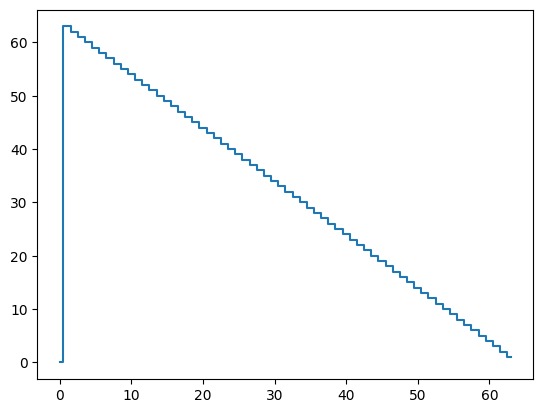

In [2]:
from matplotlib import pyplot as plt

N = 64
t = np.arange(N)

tau, n_tau = count(t)
plt.step(tau, n_tau, where='mid')

Similar trend appears for non-uniform sampling.

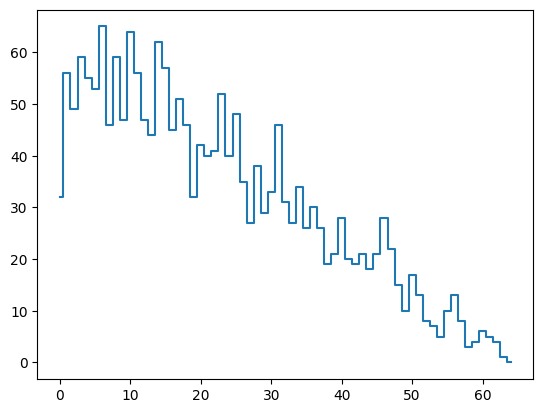

In [3]:
t = np.sort(np.random.uniform(size=N)*N)

tau, n_tau = count(t)
plt.step(tau, n_tau, where='mid')

## Golomb's Ruler

An optimal structure function sampling would sample each $tau_k$ the same number of time.
If we want this number to be just 1, then all we need is Golomb's Ruler.
However, there are only 4 perfect rulers exist, with length up to 6.
As a result, if we need to sample more than 6 different frequecies, there must be "holes" in the sampling.

Order:  11
Length: 72


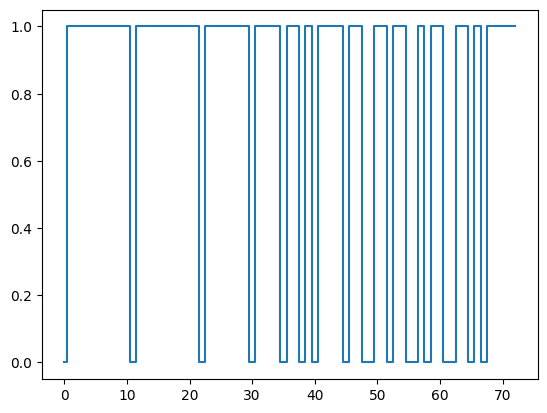

In [4]:
t = np.array([0,1,4,13,28,33,47,54,64,70,72])

print('Order: ', len(t))
print('Length:', max(t) - min(t))

tau, n_tau = count(t)
plt.step(tau, n_tau, where='mid')

Obviously, the length of the Golomb's Ruler grows faster than the square of its order.
This suggests for a length $N$, we need less than $\sqrt{N}$ sampling to (almost) uniformly sampling the frequency.

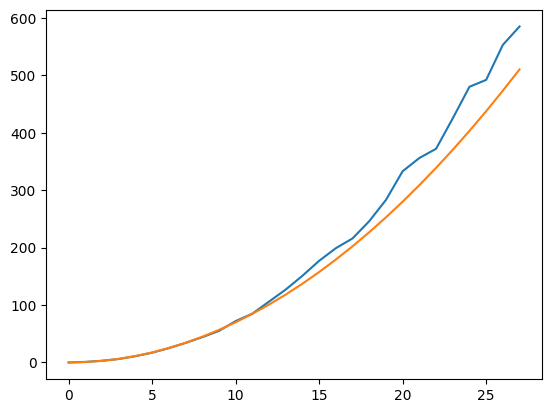

In [5]:
orders  = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])
lengths = np.array([0,1,3,6,11,17,25,34,44,55,72,85,106,127,151,177,199,216,246,283,333,356,372,425,480,492,553,585])

plt.plot(orders-1, lengths)
plt.plot(orders-1, 0.7*(orders-1)**2)